# Assignment 2 - Question 2
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q2.ipynb`.

## 2.0 Background about the dataset

TLDR: You have 4 independent variables (`float`) for each molecule. You can use a linear combination of these 4 independent variables to predict the bandgap (dependent variable) of each molecule.

You can read more about the problem in [Li et al, Bandgap tuning strategy by cations and halide ions of lead halide perovskites learned from machine learning, RSC Adv., 2021,11, 15688-15694](https://doi.org/10.1039/D1RA03117A).

In [83]:
import csv
import random
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tabulate import tabulate

In [88]:
all_molecules = list()

with open('bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)

    # creating data
    data = []
    for row in input_rows:
        data.append([float(row['Cs']), float(row['FA']), float(row['Cl']), float(row['Br']), float(row['Bandgap'])])

    # MinMax Scaling
    scaler = MinMaxScaler()
    model = scaler.fit(data)
    data = model.transform(data)
    
    for row in data:
        current_mol = ([row[0],row[1],row[2],row[3]], row[4])
        all_molecules.append(current_mol)

random.shuffle(all_molecules)

num_train = int(len(all_molecules) * 0.8)

# each point in x_train has 4 values - 1 for each feature
x_train = np.array([x[0] for x in all_molecules[:num_train]])
# each point in y_train has 1 value - the bandgap of the molecule
y_train = np.array([x[1] for x in all_molecules[:num_train]])

x_test = np.array([x[0] for x in all_molecules[num_train:]])
y_test = np.array([x[1] for x in all_molecules[num_train:]])

### 2.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

2.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

We will implement batch gradient descent to calculate the model parameters, because there are just 109 data points, so no issue regarding the speed. Parameters are updated after computing the gradient of error with respect to the training set. Batch gradient descent provides the least MSE as compared to Mini-batch and Stochastic regression, making it a good choice.

2.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

2.1.2.1 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

In [71]:
# implement Linear Regression
# function to compute predictions
def predictions(x, params):
	return np.dot(x, params)

# function to compute gradient of error function w.r.t. parameters
def gradient(x, y, params):
	h = predictions(x, params)
	g = np.dot(x.transpose(), (h - y))
	return g

# function to compute the error for current values of parameters
def cost(x, y, params):
	h = predictions(x, params)
	J = np.dot((h - y).transpose(), (h - y))
	J /= 2
	return J

# function to perform batch gradient descent
def gradient_descent(X, Y, learning_rate):
	# coeffiecinets of 4 independent variables
	params = [0.0,0.0,0.0,0.0]
	for itr in range(1000):
		for i in range(len(X)):
			params = params - learning_rate * gradient(X[i], Y[i], params)

	return params

In [72]:
learning_rate = 0.008
params = gradient_descent(x_train,y_train,learning_rate)
print('Coefficients: ',params)

Coefficients:  [ 0.01426938 -0.00652261  0.96857879  0.45529677]


In [73]:
# predicting output for X_test
y_pred = predictions(x_test, params)

# MSE
mse = np.sum((y_test - y_pred)**2 / y_test.shape[0])
print("Mean absolute error = ", mse)

Mean absolute error =  0.006451296701300799


I have used learning rate = 0.08 and obtained MSE = 0.006451296701300799 as the best MSE.

2.1.3 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

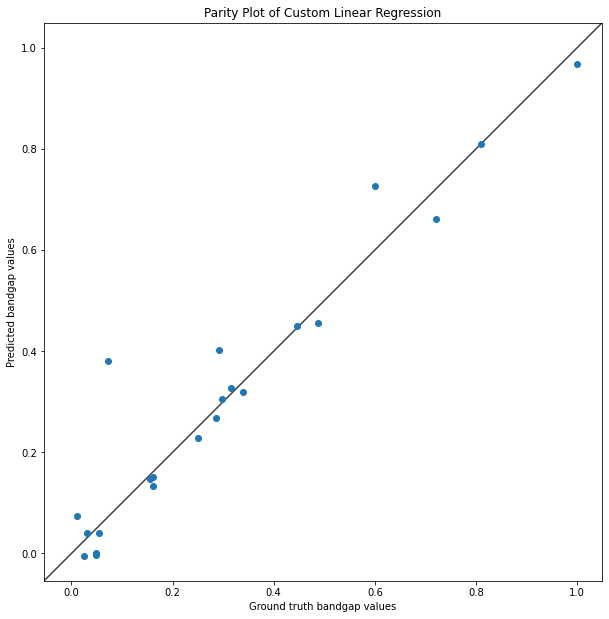

In [74]:
# Get the predictions of x_test into `y_pred`
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,20))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

In [94]:
X = []
Y = []
for row in data:
    X.append([row[0],row[1],row[2],row[3]])
    Y.append(row[4])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(scaled_X, Y,train_size = 0.8)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

### 2.2 Implement Ridge regression
2.2.1 Explain Ridge regression briefly in 1-2 lines.

Ans) A Ridge regressor is basically a regularized version of a Linear Regressor. i.e to the original cost function of linear regressor we add a regularized term that forces the learning algorithm to fit the data and helps to keep the weights lower as possible. The regularized term has the parameter ‘alpha’ which controls the regularization of the model i.e helps in reducing the variance of the estimates.

<!-- Your answer to 1.2.1 -->

2.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

Ans) Ans: Increasing alpha(regularization parameter value) results in weights getting reduced. This may result in some of the weights becoming zero. This is why Lasso regression is also considered for supervised feature selection.

In [92]:
# you should not have imported sklearn before this point
from sklearn.linear_model import Ridge

alpha = [0.001,0.01,0.1,1.0,10.0,100.0]
table_values = []
for alp in alpha:
    model = Ridge(alpha = alp,  tol = 0.001, solver ='auto', random_state = 42)
    model.fit(x_train, y_train)
    
    # predicting the y_test
    y_pred = model.predict(x_test)
    
    # finding rmse for our model
    mse = np.sum((y_test - y_pred)**2 / y_test.shape[0])
    rmse = math.sqrt(mse)
    table_values.append([alp,rmse])

head = ['alpha', 'RMSE']
print('RMSE values for different alpha values')
print(tabulate(table_values, headers=head, tablefmt="grid"))

RMSE values for different alpha values
+---------+-----------+
|   alpha |      RMSE |
+=========+===========+
|   0.001 | 0.0283795 |
+---------+-----------+
|   0.01  | 0.0283783 |
+---------+-----------+
|   0.1   | 0.0283669 |
+---------+-----------+
|   1     | 0.0283764 |
+---------+-----------+
|  10     | 0.0365609 |
+---------+-----------+
| 100     | 0.125617  |
+---------+-----------+


### 2.3 Implement Lasso regression
2.3.1 Explain Lasso regression briefly in 1-2 lines.

Ans: Lasso regression extends Linear regression in the way that a regularization element(L1 norm) is added to the least squares loss function of linear regression in order to induce the penalty (decrease weights) against complexity (large number of features).

2.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

Ans: Increasing alpha(regularization parameter value) results in weights getting reduced. This may result in some of the weights becoming zero. This is why Lasso regression is also considered for supervised feature selection.

In [99]:
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`
from sklearn.linear_model import Lasso

alpha = [0.0001,0.001,0.01,0.1,1.0,10.0]
table_values = []
for alp in alpha:
    model = Lasso(alpha = alp,  tol = 0.001, random_state = 42)
    model.fit(x_train, y_train)
    
    # predicting the y_test
    y_pred = model.predict(x_test)
    
    # finding rmse for our model
    mse = np.sum((y_test - y_pred)**2 / y_test.shape[0])
    rmse = math.sqrt(mse)
    table_values.append([alp,rmse])

head = ['alpha', 'RMSE']
print('RMSE values for different alpha values')
print(tabulate(table_values, headers=head, tablefmt="grid"))

RMSE values for different alpha values
+---------+-----------+
|   alpha |      RMSE |
+=========+===========+
|  0.0001 | 0.0338808 |
+---------+-----------+
|  0.001  | 0.0343317 |
+---------+-----------+
|  0.01   | 0.0416948 |
+---------+-----------+
|  0.1    | 0.15001   |
+---------+-----------+
|  1      | 0.261296  |
+---------+-----------+
| 10      | 0.261296  |
+---------+-----------+
